Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:22: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:23: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


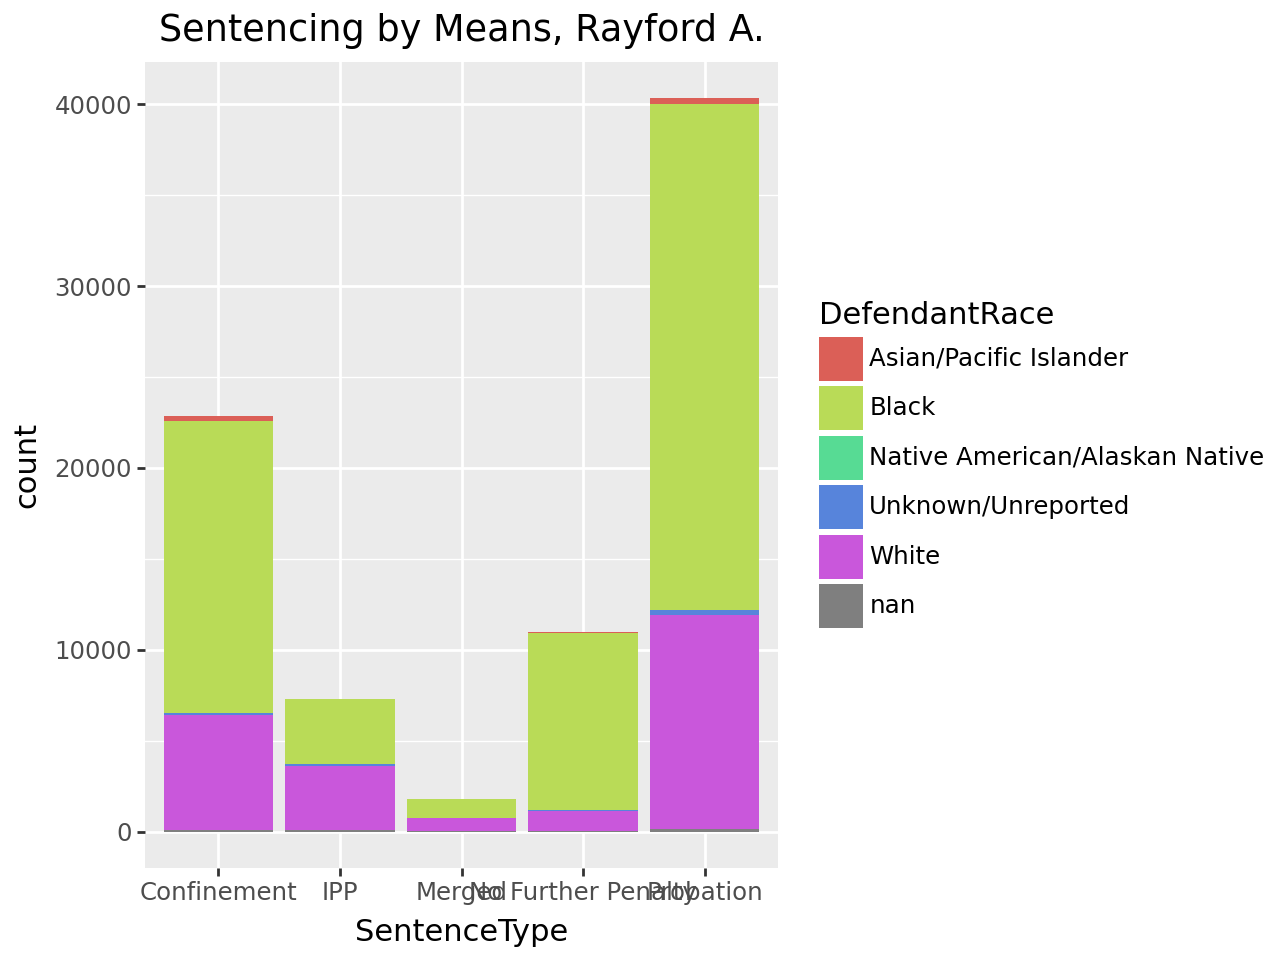

C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:22: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:23: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


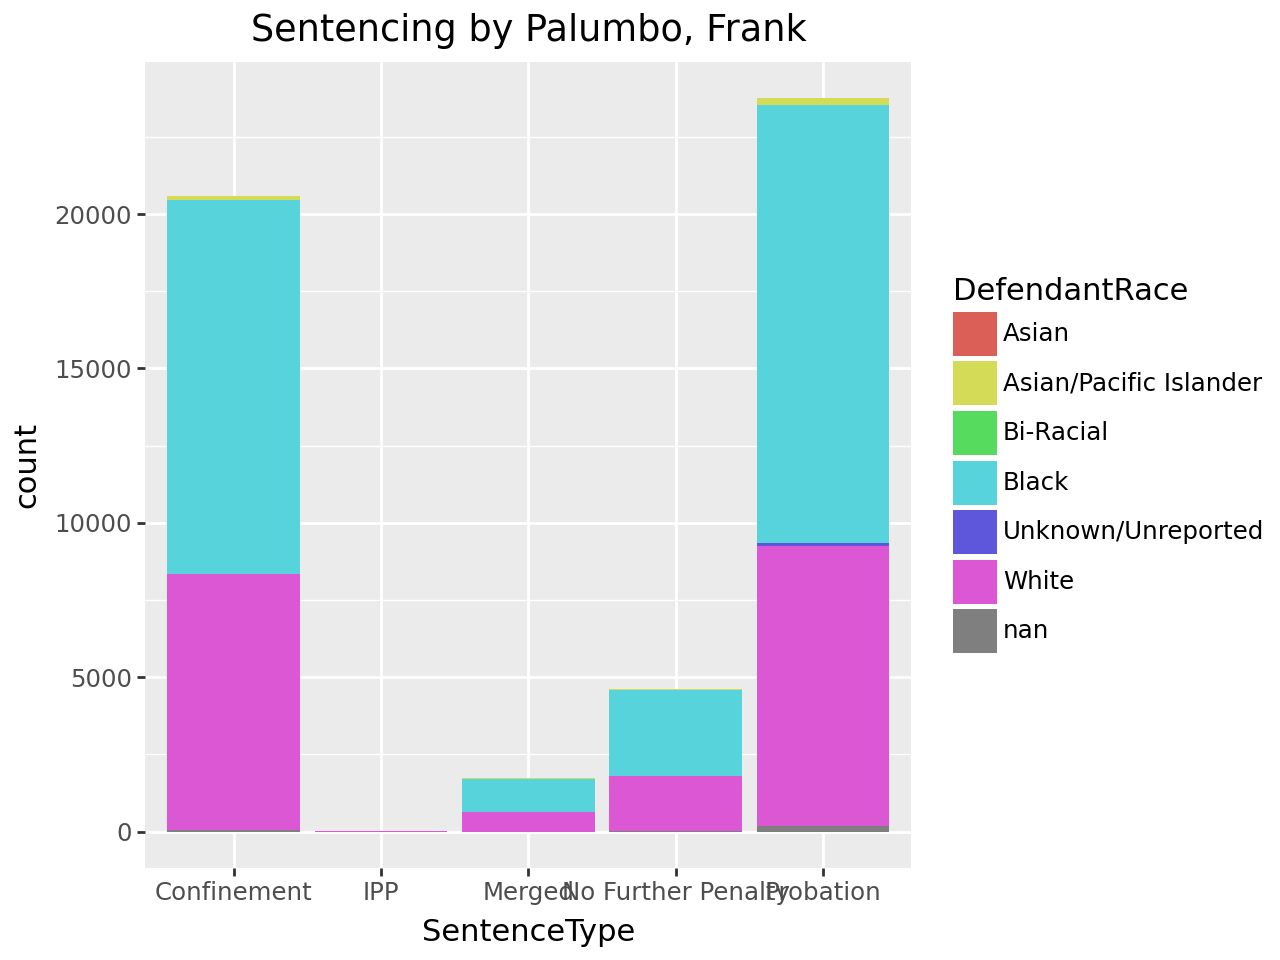

C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:22: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:23: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


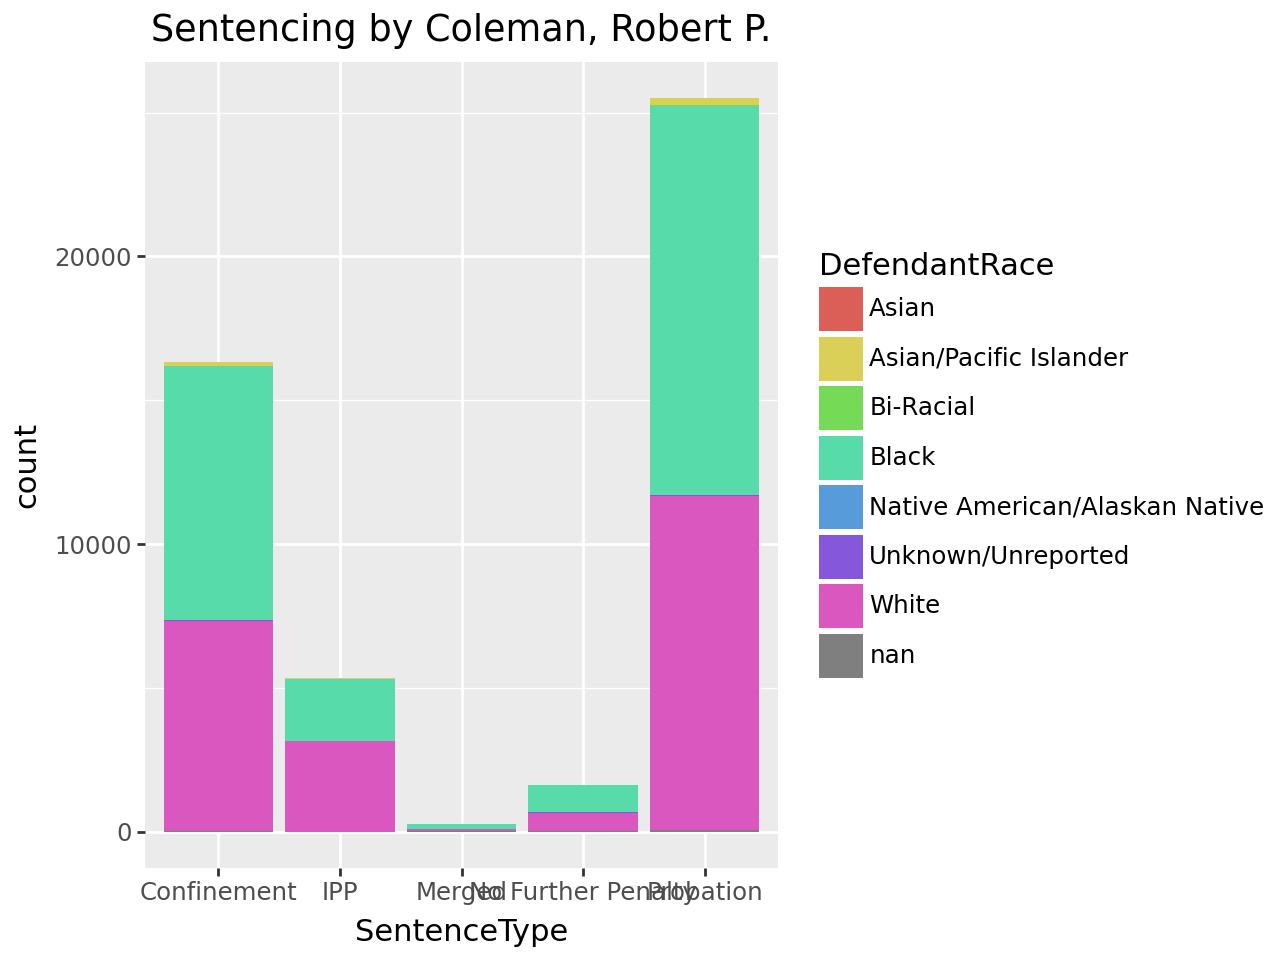

C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:22: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:23: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


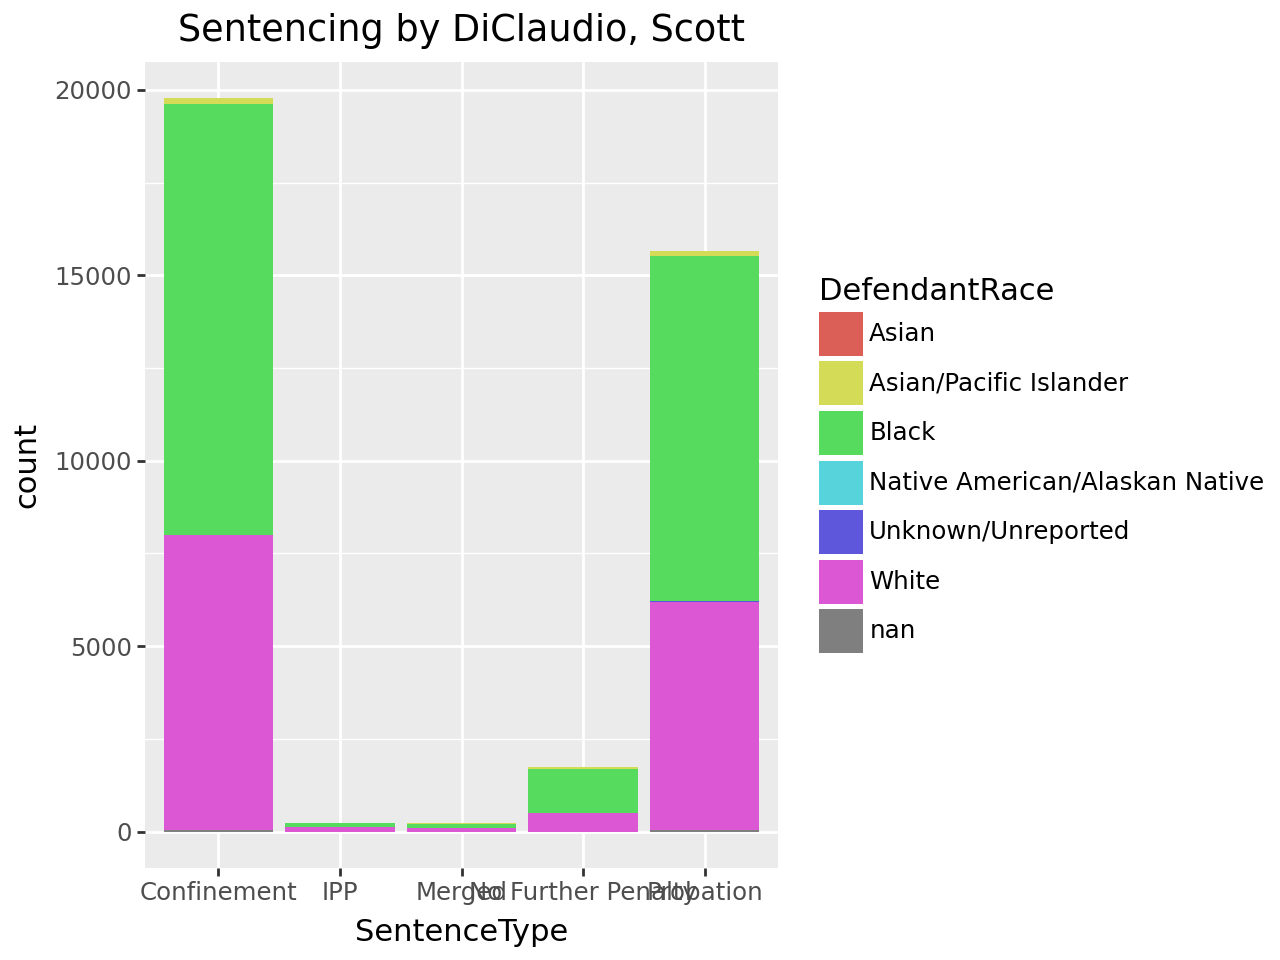

C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:22: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:23: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
C:\Users\HP\AppData\Local\Temp\ipykernel_18400\3086363534.py:28: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


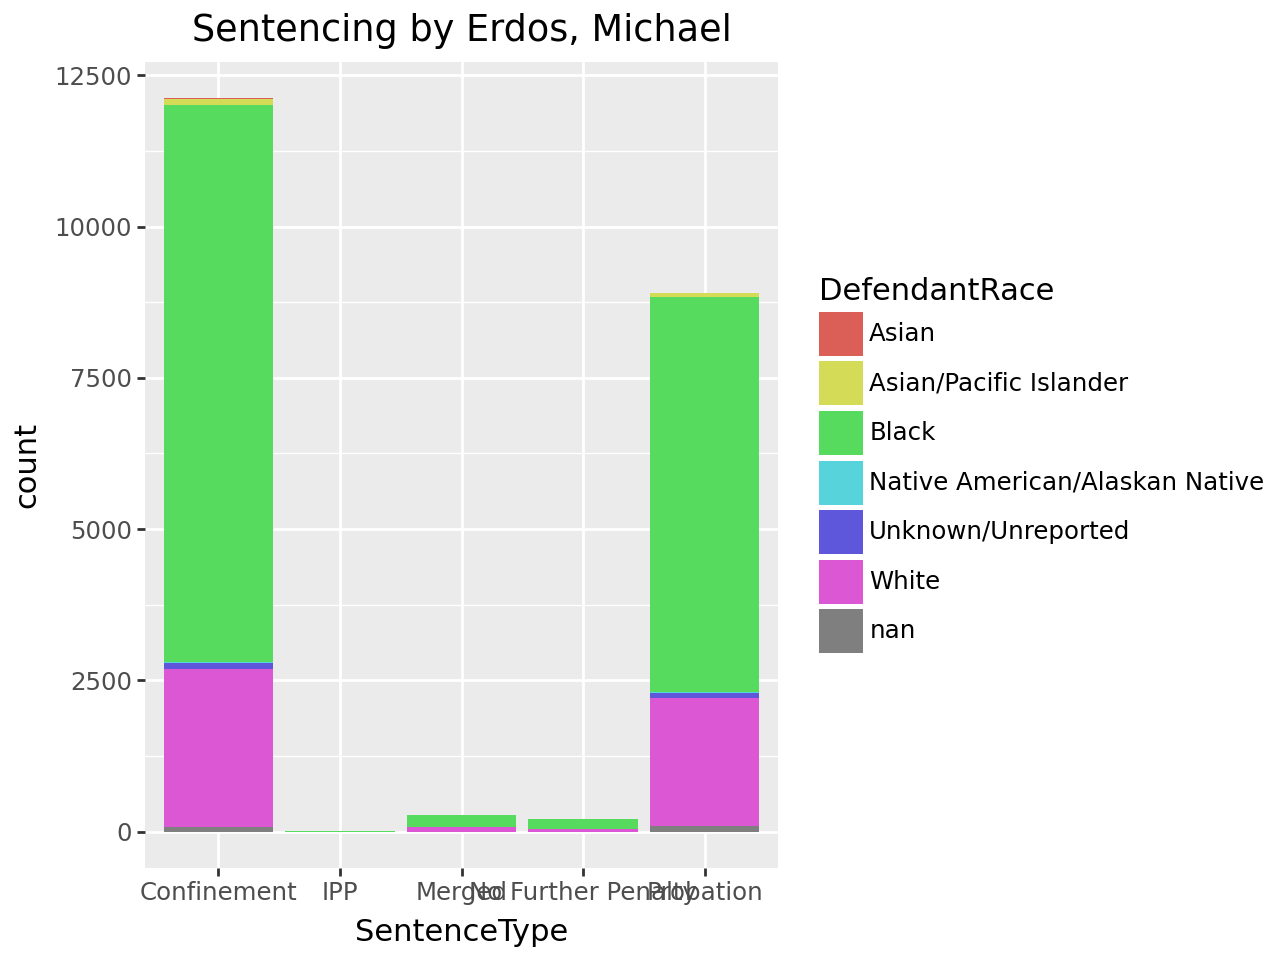

In [1]:
%pip install polars
import polars as pl
from plotnine import *

df = pl.read_parquet("CPCMS_SentenceData.parquet")
cases = pl.read_parquet("CPCMS_CaseData.parquet")

judge_column = "SentencingJudge"
specified_judges = [
    'Means, Rayford A.',
    'Palumbo, Frank',
    'Coleman, Robert P.',
    'DiClaudio, Scott',
    'Erdos, Michael'
]

for judge in specified_judges:
    filtered_df = df.filter(pl.col(judge_column) == judge)
    plot = (
        filtered_df
        .join(cases, on="DocketNumber")
        .groupby("SentenceType", "DefendantRace")
        .agg(pl.count())
        .to_pandas()
        >> ggplot(aes(x="SentenceType", y="count", fill="DefendantRace")) + geom_col()
        + labs(title=f"Sentencing by {judge}")
    )
    print(plot)
